In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
users = pd.read_csv('C:\\Users\\panag\\Desktop\\Project Future\\Project\\data\\users_new.csv')

# 3.Machine Learning Model

In [3]:
users.columns

Index(['Unnamed: 0', 'user_id', 'birth_year', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan', 'num_contacts', 'North-East',
       'UK', 'West-South', 'brand', 'number_of_transactions',
       'completed_transactions', 'transactions_last_15_days',
       'total_amount_usd', 'total_amount_usd_completed', 'EMAIL', 'PUSH',
       'SMS', 'PUSH_sent', 'EMAIL_sent', 'SMS_sent', 'Perc_comp_transactions',
       'Perc_compl_amount', 'transactions_april_2019',
       'transactions_Jan_Feb_Mar_2019', 'max_amount_usd_completed',
       'min_amount_usd_completed', 'mean_amount_usd_completed'],
      dtype='object')

# 3.1 Features of the Model

In [4]:
X = users[['birth_year', 'city', 'created_date', 'user_settings_crypto_unlocked',
        'num_contacts', 'North-East', 'UK', 'West-South', 'brand',
       'number_of_transactions', 'completed_transactions',
       'Perc_comp_transactions', 'transactions_last_15_days',
       'transactions_april_2019', 'transactions_Jan_Feb_Mar_2019',
       'total_amount_usd', 'total_amount_usd_completed', 'Perc_compl_amount',
       'max_amount_usd_completed', 'min_amount_usd_completed',
       'mean_amount_usd_completed', 'EMAIL', 'PUSH', 'SMS', 'PUSH_sent',
       'EMAIL_sent', 'SMS_sent']]

In [5]:
y = users['plan']

# 3.2 Recursive Feature elimination

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12435, 27), (3109, 27), (12435,), (3109,))

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

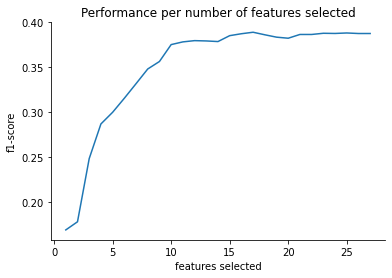

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import warnings

warnings.filterwarnings('ignore')

clf = LogisticRegression(solver='lbfgs', multi_class='auto')

rfecv = RFECV(estimator=clf, cv=5, scoring='f1')  
rfecv.fit(X_train, y_train)

#                                                PLOTTING:
#                              --------------------------------------------

ax = plt.subplot(111)
ax.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

ax.set_title('Performance per number of features selected')
ax.set_xlabel('features selected')
ax.set_ylabel('f1-score')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [10]:
rfecv.support_

array([ True, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False])

In [11]:
rfecv.grid_scores_

array([0.16907471, 0.17813465, 0.24843098, 0.28699455, 0.29996907,
       0.31559482, 0.33179256, 0.34816301, 0.3564944 , 0.37530839,
       0.37831717, 0.37971212, 0.37936976, 0.37868976, 0.3852509 ,
       0.38739227, 0.38905121, 0.38622879, 0.38358217, 0.38239619,
       0.38657846, 0.38657846, 0.38790112, 0.38770404, 0.38823665,
       0.38764227, 0.38764227])

## 3.3 Machine Learning Model

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier

In [15]:
from imblearn.pipeline import Pipeline

sc = StandardScaler()  
rus = RandomUnderSampler()  
knn = MLPClassifier()

pipe = Pipeline([('scaler',sc),('sampler',rus),('classifier',knn)])

grid = {'classifier__hidden_layer_sizes' : [ (10,),(20,),(30), (50,),(30,10), (50, 20), (50, 10), (50, 30)],
        'classifier__batch_size' : [200,250,300],
        'classifier__activation' : ['logistic', 'relu'],
        'classifier__learning_rate_init' : [0.01, 0.002]}

gs = GridSearchCV(pipe, grid, cv=5, scoring='f1')
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('classifier', MLPClassifier())]),
             param_grid={'classifier__activation': ['logistic', 'relu'],
                         'classifier__batch_size': [200, 250, 300],
                         'classifier__hidden_layer_sizes': [(10,), (20,), 30,
                                                            (50,), (30, 10),
                                                            (50, 20), (50, 10),
                                                            (50, 30)],
                         'classifier__learning_rate_init': [0.01, 0.002]},
             scoring='f1')

In [16]:
gs.best_params_

{'classifier__activation': 'logistic',
 'classifier__batch_size': 250,
 'classifier__hidden_layer_sizes': (50, 30),
 'classifier__learning_rate_init': 0.002}

In [17]:
preds = gs.predict(X_test)    
f1_score(y_test,preds)

0.3782654127481714

In [18]:
print(accuracy_score(y_test,preds))
print('-----------------------------')
print(classification_report(y_test,preds))

0.8086201350916693
-----------------------------
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      2889
           1       0.25      0.82      0.38       220

    accuracy                           0.81      3109
   macro avg       0.61      0.82      0.63      3109
weighted avg       0.93      0.81      0.85      3109

